# The packages

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from matplotlib import colors
from matplotlib import cm

In [4]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
import networkx as nx

# Read zachary dataset

In [6]:
G = nx.karate_club_graph()

In [7]:
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


# Centrality measures

In [8]:
deg_centrality = nx.degree_centrality(G)

In [9]:
close_centrality = nx.closeness_centrality(G)

In [10]:
bet_centrality = nx.betweenness_centrality(G)

In [11]:
eig_centrality=nx.eigenvector_centrality(G)

In [29]:
table=pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    table=table.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
table.head(10)

,BC,CC,DC,EC,Node
0,0.437635,0.568966,0.484848,0.355483,0
1,0.053937,0.485294,0.272727,0.265954,1
2,0.143657,0.559322,0.303030,0.317189,2
3,0.011909,0.464789,0.181818,0.211174,3
4,0.000631,0.379310,0.090909,0.075966,4
5,0.029987,0.383721,0.121212,0.079481,5
6,0.029987,0.383721,0.121212,0.079481,6
7,0.000000,0.440000,0.121212,0.170955,7
8,0.055927,0.515625,0.151515,0.227405,8
9,0.000848,0.434211,0.060606,0.102675,9


In [15]:
trainingData = table[["DC","BC","CC","EC"]]
trainingData.head()

,DC,BC,CC,EC
0,0.484848,0.437635,0.568966,0.355483
1,0.272727,0.053937,0.485294,0.265954
2,0.303030,0.143657,0.559322,0.317189
3,0.181818,0.011909,0.464789,0.211174
4,0.090909,0.000631,0.379310,0.075966


# Elbow Method

In [16]:
K =range(1, 10)
inertias=[]
X=nx.to_numpy_array(G, nodelist=[i for i in range(34)])
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(trainingData)
    inertias.append(kmeanModel.inertia_)

C:\Users\Visitor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


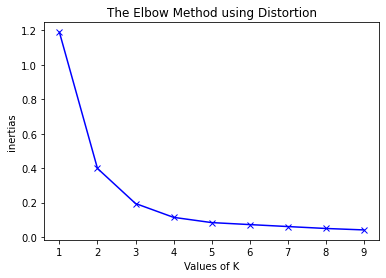

In [17]:
plt.plot(K,inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

In [20]:
from kneed import KneeLocator
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
k=kn.knee
k

3

In [21]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(trainingData)

KMeans(n_clusters=3)

In [22]:
Nodes = pd.DataFrame([i for i in range(34)], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,2
1,1,0
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,1
8,8,0
9,9,1


In [23]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,1
1,4
2,0


In [24]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(k):
    comm.append(gk.get_group(i)['Node'].tolist())
    
comm[1]

[4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [26]:
pos = nx.spring_layout(G)

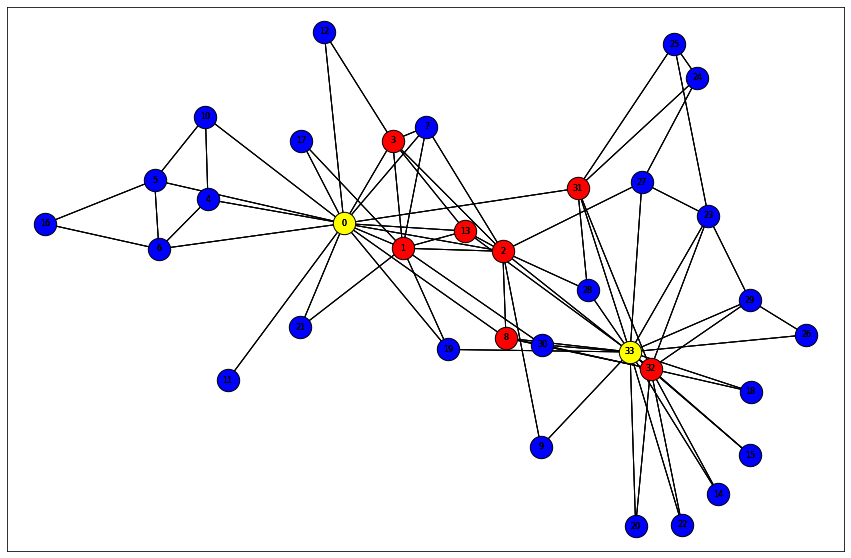

In [28]:
plt.rcParams.update({'figure.figsize': (15, 10)})
colors=['red','blue','yellow','green','lightblue','white','brown','grey','purple','pink','orange','gold','olive']
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=True,node_size=500, font_size=8,
        edgecolors='black')